In [1]:
import os 
sims = os.listdir('./')
sims = [i for i in sims if 'x' in i]
sims = [i for i in sims if '.txt' not in i]
sims = [i for i in sims if '.pkl' not in i]
simsnames = [i.split('_')[0][1:] for i in sims]


In [2]:
from HeaderP import *
import pynbody as pb
import pynbody.filt as filt
import os, pickle, glob

In [8]:
def readsimdata(simNo,Rcut,Rcut_thread,zcut_thread,disk=True):
    if disk:
        data=pd.read_pickle('./g'+simNo+'_z_0_decomp.pkl')
    else:
        data=pd.read_pickle('./g'+simNo+'_z_0.pkl')
    data['R']=np.sqrt((data['x'])**2+data['y']**2)
    
    if Rcut:
        data=data.loc[data['Rbir']<Rcut_thread].reset_index(drop=True)
        data=data.loc[abs(data['zbir'])<zcut_thread].reset_index(drop=True)
    data['dR']=data['R']-data['Rbir']
    data['dz']=abs(data['z'])-abs(data['zbir'])
    if disk:
        data = data.loc[(data['decomp']==1)|(data['decomp']==4)].reset_index()
    scale_fe=0.250019907951355/0.35828184923028494
    scale_o=0.10861970484256744/0.09543676896214373
    data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
    data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
    return data


def normalize_data(data):
    return (data-np.mean(data))/np.std(data)

def train(y, X):
    """
    
    Args:
        y (array): An Nstar array of rotation periods.
        X (array): An Nstar x NX array of features.
        
    Returns:
        weights (array): The array of weights of length NX + 1.
        
    """
    A = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Shape: Nstars x Nfeatures (incl crossterms)
    AT = A.T
    ATA = np.dot(AT, A)
    
    weights = np.linalg.solve(ATA, np.dot(AT, y))
    return weights

import matplotlib
from scipy import interpolate
from scipy.interpolate import interp1d
def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange[:-1]), vmax=max(vrange[:-1]))
    return [cmap(norm(i)) for i in vrange]

In [4]:
agepickle = readsimdata(simsnames[4],True, 15, 5)

for i in [4]:
    print(sims[i])
    simname = sims[i]
    
    allsnaps = glob.glob(sims[i]+'/*.?????')
    
    allsnaps_time = [int(i.split('.')[-1]) for i in allsnaps if (('param' not in i) and ('draco' not in i) and ('dat_' not in i) and ('79e12' not in i.split('.')[-1]))]
    snaplookup = {int(allsnaps[i].split('.')[-1]):allsnaps[i] for i in range(len(allsnaps)) if (('param' not in allsnaps[i]) and ('draco' not in allsnaps[i]) and ('dat_' not in allsnaps[i]) and ('79e12' not in allsnaps[i].split('.')[-1]))}

    sortage = sorted(allsnaps_time)
    redshifts = np.zeros(len(sortage))
    allages_rs = np.zeros(len(redshifts))
    for j in trange(len(sortage)):
        s = pb.load(snaplookup[sortage[j]])
        h = s.properties['h']
        ages = float(str(s.properties['time']).split(' ')[0])
        allages_rs[j] = ages
        try:
            redshifts[j] = pb.analysis.cosmology.redshift(s, ages)
        except:
            redshifts[j] = 0

g2.79e12_3x6


 98%|█████████▊| 225/229 [01:10<00:00,  4.19it/s]/data/shared_data/anaconda3/lib/python3.8/site-packages/pynbody/analysis/cosmology.py:21: RuntimeWarning: invalid value encountered in sqrt
  return h0 * a * np.sqrt(om_m * (a ** -3) + om_k * (a ** -2) + om_l)
/data/shared_data/anaconda3/lib/python3.8/site-packages/pynbody/analysis/cosmology.py:171: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return scipy.integrate.quad(_a_dot_recip, 0, x, (h0, omM, omL))[0] * conv
100%|██████████| 229/229 [01:11<00:00,  3.21it/s]


(array([5.96, 5.89, 5.82, 5.75, 5.68, 5.61, 5.54, 5.47, 5.4 , 5.33, 5.26,
        5.19, 5.11, 5.04, 4.97, 4.9 , 4.83, 4.76, 4.69, 4.62, 4.55, 4.48,
        4.41, 4.34, 4.27, 4.2 , 4.13, 4.1 , 4.  , 3.9 , 3.8 , 3.8 , 3.7 ,
        3.6 , 3.6 , 3.5 , 3.4 , 3.3 , 3.3 , 3.2 , 3.1 , 3.1 ]),
 array([0.56499623, 0.55470148, 0.54453824, 0.53450358, 0.52459466,
        0.51480873, 0.50514311, 0.49559522, 0.48616254, 0.47684263,
        0.46763312, 0.45853172, 0.44825963, 0.43938245, 0.43060657,
        0.42192995, 0.41335062, 0.40486665, 0.39647615, 0.38817732,
        0.37996838, 0.37184761, 0.36381332, 0.35586389, 0.34799773,
        0.34021327, 0.33250903, 0.3292314 , 0.31840897, 0.30774188,
        0.29722617, 0.29722617, 0.28685802, 0.27663377, 0.27663377,
        0.26654986, 0.25660287, 0.24678949, 0.24678949, 0.23710653,
        0.2275509 , 0.2275509 ]))

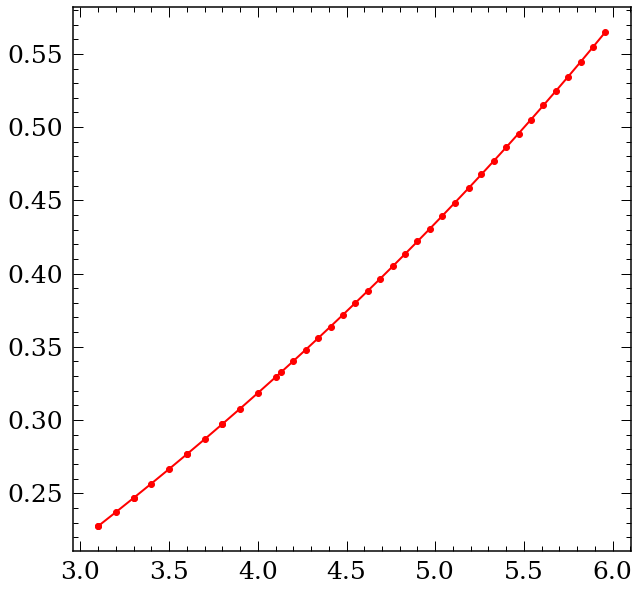

In [5]:
allages_rs = 14.1-allages_rs
m = np.array((allages_rs>3)&(allages_rs<6), dtype = bool)
plt.plot(allages_rs[m], redshifts[m], 'ro-')
allages_rs[m], redshifts[m]

In [6]:
    
# pick out stars between redshift 0.3-0.4
redshifts, sortage, allages_rs = zip(*sorted(zip(np.array(redshifts)[m], np.array(sortage)[m], np.array(allages_rs)[m])))
redshifts, sortage, allages_rs = redshifts[::-1], sortage[::-1], allages_rs[::-1]


In [13]:
from os.path import exists

print(len(redshifts))
cols = ['iord','r','z']
meanfeh = np.zeros(len(redshifts)-1)
stdfeh = np.zeros(len(redshifts)-1)
redshift_feh = np.zeros(len(redshifts)-1)
for j in trange(len(redshifts)-1):
    if j==0:
        print('reading ',snaplookup[sortage[j]])
        if exists(snaplookup[sortage[j]]+'.pkl'):
            this_snap = pd.read_pickle(snaplookup[sortage[j]]+'.pkl')
            try:
                this_snap['feh_scale']
            except:
                this_snap = pd.merge(this_snap, agepickle[['iord', 'feh_scale']], left_on='iord', right_on='iord', how='inner')
            
        
        else:
            s = pb.load(snaplookup[sortage[j]])
            h=s.halos()
            pb.analysis.angmom.faceon(h[1])
            s.physical_units()

            sim = h[1]

            stars = sim.s
            this_snap = pd.DataFrame({k:stars[k] for k in cols})
            this_snap = pd.merge(this_snap, agepickle[['iord', 'age', 'feh_scale','Rbir','zbir']], left_on='iord', right_on='iord', how='inner')
            this_snap.to_pickle(snaplookup[sortage[j]]+'.pkl')
        # next snapshot
        print('reading ',snaplookup[sortage[j+1]])
        if exists(snaplookup[sortage[j+1]]+'.pkl'):
            this_snap1 = pd.read_pickle(snaplookup[sortage[j+1]]+'.pkl')
            try:
                this_snap1['feh_scale']
            except:
                this_snap1 = pd.merge(this_snap1, agepickle[['iord', 'feh_scale']], left_on='iord', right_on='iord', how='inner')
            
        else:
            s1 = pb.load(snaplookup[sortage[j+1]])
            h1=s1.halos()
            pb.analysis.angmom.faceon(h1[1])
            s1.physical_units()

            sim1 = h1[1]

            stars1 = sim1.s
            this_snap1 = pd.DataFrame({k:stars1[k] for k in cols})
            this_snap1 = pd.merge(this_snap1, agepickle[['iord', 'age', 'feh_scale','Rbir','zbir','decomp']], left_on='iord', right_on='iord', how='inner')
            this_snap1.to_pickle(snaplookup[sortage[j+1]]+'.pkl')
    else:
        this_snap = this_snap1.copy(deep=True)

        # next snapshot
        print('reading ',snaplookup[sortage[j+1]])
        if exists(snaplookup[sortage[j+1]]+'.pkl'):
            this_snap1 = pd.read_pickle(snaplookup[sortage[j+1]]+'.pkl')
            try:
                this_snap1['feh_scale']
            except:
                this_snap1 = pd.merge(this_snap1, agepickle[['iord', 'feh_scale']], left_on='iord', right_on='iord', how='inner')
            
        else:
            s1 = pb.load(snaplookup[sortage[j+1]])
            h1=s1.halos()
            pb.analysis.angmom.faceon(h1[1])
            s1.physical_units()

            sim1 = h1[1]

            stars1 = sim1.s
            this_snap1 = pd.DataFrame({k:stars1[k] for k in cols})
            this_snap1 = pd.merge(this_snap1, agepickle[['iord', 'age', 'feh_scale','Rbir','zbir','decomp']], left_on='iord', right_on='iord', how='inner')
            this_snap1.to_pickle(snaplookup[sortage[j+1]]+'.pkl')
            
    print('stars in snapshot z = %.4f:'%redshifts[j],len(this_snap),', stars in snapshot z = %.4f:'%redshifts[j+1],len(this_snap1))
    # find new born stars
    newstars = this_snap1.loc[~(this_snap1['iord'].isin(this_snap['iord']))]
    newstars = newstars.loc[abs(newstars['r']-8)<1]
    newstars = newstars.loc[abs(newstars['z'])<0.5]
    newstars = newstars.loc[(newstars['age']<6)].reset_index(drop=True)
    redshift_feh[j] = redshifts[j]
    meanfeh[j] = np.mean(newstars['feh_scale'])
    stdfeh[j] = np.std(newstars['feh_scale'])
    print('new stars born:', len(newstars), ', mean age:', np.mean(newstars['age'].dropna()),', mean feh:', np.mean(newstars['feh_scale'].dropna()))
    

    # plot
    #plt.hist(newstars['feh_scale'], bins=np.linspace(-1, 0.5, 50), color = colors[j], alpha = 0.2, density=True)
    
#plt.ylim([2, 14])
#plt.xlim([-1, 0.5])
#cb = plt.colorbar()
#cb.set_label('redshift')

42


  0%|          | 0/41 [00:00<?, ?it/s]

reading  g2.79e12_3x6/2.79e12.01150
reading  g2.79e12_3x6/2.79e12.01160


  2%|▏         | 1/41 [00:01<01:11,  1.79s/it]

stars in snapshot z = 0.5650: 1811926 , stars in snapshot z = 0.5547: 1823124
new stars born: 1749 , mean age: 5.961083609670239 , mean feh: 0.10044289360038477
reading  g2.79e12_3x6/2.79e12.01170


  5%|▍         | 2/41 [00:02<00:50,  1.31s/it]

stars in snapshot z = 0.5547: 1823124 , stars in snapshot z = 0.5445: 1836712
new stars born: 1799 , mean age: 5.896976858647717 , mean feh: 0.08002921385638896
reading  g2.79e12_3x6/2.79e12.01180


  7%|▋         | 3/41 [00:03<00:48,  1.28s/it]

stars in snapshot z = 0.5445: 1836712 , stars in snapshot z = 0.5345: 1848261
new stars born: 1303 , mean age: 5.8264274961814335 , mean feh: 0.07802120007709588
reading  g2.79e12_3x6/2.79e12.01190


 10%|▉         | 4/41 [00:05<00:44,  1.21s/it]

stars in snapshot z = 0.5345: 1848261 , stars in snapshot z = 0.5246: 1860733
new stars born: 1693 , mean age: 5.749615918433597 , mean feh: 0.08430493443411868
reading  g2.79e12_3x6/2.79e12.01200


 12%|█▏        | 5/41 [00:06<00:48,  1.34s/it]

stars in snapshot z = 0.5246: 1860733 , stars in snapshot z = 0.5148: 1871169
new stars born: 1232 , mean age: 5.681495998182043 , mean feh: 0.09565234508095743
reading  g2.79e12_3x6/2.79e12.01210


 15%|█▍        | 6/41 [00:08<00:50,  1.46s/it]

stars in snapshot z = 0.5148: 1871169 , stars in snapshot z = 0.5051: 1882194
new stars born: 1212 , mean age: 5.612323418614356 , mean feh: 0.10192451556504283
reading  g2.79e12_3x6/2.79e12.01220


 17%|█▋        | 7/41 [00:09<00:50,  1.50s/it]

stars in snapshot z = 0.5051: 1882194 , stars in snapshot z = 0.4956: 1893354
new stars born: 1821 , mean age: 5.540405688939164 , mean feh: 0.10912506050106453
reading  g2.79e12_3x6/2.79e12.01230
stars in snapshot z = 0.4956: 1893354 , stars in snapshot z = 0.4862: 1903933


 20%|█▉        | 8/41 [00:11<00:52,  1.59s/it]

new stars born: 1642 , mean age: 5.463043773171985 , mean feh: 0.12154660030621739
reading  g2.79e12_3x6/2.79e12.01240


 22%|██▏       | 9/41 [00:13<00:48,  1.53s/it]

stars in snapshot z = 0.4862: 1903933 , stars in snapshot z = 0.4768: 1914449
new stars born: 969 , mean age: 5.407305402844007 , mean feh: 0.11181651720005462
reading  g2.79e12_3x6/2.79e12.01250
stars in snapshot z = 0.4768: 1914449 , stars in snapshot z = 0.4676: 1926734
new stars born: 1137 , mean age: 5.327736481690217 , mean feh: 0.11190678580277605

 24%|██▍       | 10/41 [00:14<00:45,  1.48s/it]


reading  g2.79e12_3x6/2.79e12.01260


 27%|██▋       | 11/41 [00:16<00:49,  1.63s/it]

stars in snapshot z = 0.4676: 1926734 , stars in snapshot z = 0.4585: 1937449
new stars born: 1177 , mean age: 5.255390958085392 , mean feh: 0.10215883885575949
reading  g2.79e12_3x6/2.79e12.01270


 29%|██▉       | 12/41 [00:17<00:43,  1.50s/it]

stars in snapshot z = 0.4585: 1937449 , stars in snapshot z = 0.4483: 1946227
new stars born: 955 , mean age: 5.184012752314168 , mean feh: 0.11724973993579768
reading  g2.79e12_3x6/2.79e12.01280


 32%|███▏      | 13/41 [00:18<00:39,  1.40s/it]

stars in snapshot z = 0.4483: 1946227 , stars in snapshot z = 0.4394: 1957812
new stars born: 1170 , mean age: 5.122101203237154 , mean feh: 0.11589951154143645
reading  g2.79e12_3x6/2.79e12.01290


 34%|███▍      | 14/41 [00:19<00:31,  1.16s/it]

stars in snapshot z = 0.4394: 1957812 , stars in snapshot z = 0.4306: 1967421
new stars born: 737 , mean age: 5.058841216367235 , mean feh: 0.12173713920694576
reading  g2.79e12_3x6/2.79e12.01300


 37%|███▋      | 15/41 [00:20<00:28,  1.09s/it]

stars in snapshot z = 0.4306: 1967421 , stars in snapshot z = 0.4219: 1977741
new stars born: 976 , mean age: 4.978423321476931 , mean feh: 0.10555058619459089
reading  g2.79e12_3x6/2.79e12.01310
stars in snapshot z = 0.4219: 1977741 , stars in snapshot z = 0.4134: 1987185


 39%|███▉      | 16/41 [00:21<00:27,  1.09s/it]

new stars born: 1163 , mean age: 4.911278458652914 , mean feh: 0.10882348166931427
reading  g2.79e12_3x6/2.79e12.01320
stars in snapshot z = 0.4134: 1987185 , stars in snapshot z = 0.4049: 1996198


 41%|████▏     | 17/41 [00:22<00:27,  1.16s/it]

new stars born: 741 , mean age: 4.836191349791945 , mean feh: 0.12414149796979919
reading  g2.79e12_3x6/2.79e12.01330
stars in snapshot z = 0.4049: 1996198 , stars in snapshot z = 0.3965: 2005928


 44%|████▍     | 18/41 [00:23<00:22,  1.02it/s]

new stars born: 942 , mean age: 4.760517056585073 , mean feh: 0.13616280283358786
reading  g2.79e12_3x6/2.79e12.01340
stars in snapshot z = 0.3965: 2005928 , stars in snapshot z = 0.3882: 2014946


 46%|████▋     | 19/41 [00:23<00:19,  1.16it/s]

new stars born: 722 , mean age: 4.6980390547218285 , mean feh: 0.12389016437302053
reading  g2.79e12_3x6/2.79e12.01350
stars in snapshot z = 0.3882: 2014946 , stars in snapshot z = 0.3800: 2023969


 49%|████▉     | 20/41 [00:24<00:18,  1.14it/s]

new stars born: 778 , mean age: 4.626285541344033 , mean feh: 0.12409937005187524
reading  g2.79e12_3x6/2.79e12.01360
stars in snapshot z = 0.3800: 2023969 , stars in snapshot z = 0.3718: 2032005


 51%|█████     | 21/41 [00:25<00:18,  1.06it/s]

new stars born: 384 , mean age: 4.546594312280664 , mean feh: 0.15755582752204297
reading  g2.79e12_3x6/2.79e12.01370
stars in snapshot z = 0.3718: 2032005 , stars in snapshot z = 0.3638: 2042015


 54%|█████▎    | 22/41 [00:26<00:15,  1.21it/s]

new stars born: 681 , mean age: 4.486060498905012 , mean feh: 0.130109214329452
reading  g2.79e12_3x6/2.79e12.01380
stars in snapshot z = 0.3638: 2042015 , stars in snapshot z = 0.3559: 2050794


 56%|█████▌    | 23/41 [00:27<00:16,  1.09it/s]

new stars born: 617 , mean age: 4.409731138870223 , mean feh: 0.14338538563085085
reading  g2.79e12_3x6/2.79e12.01390
stars in snapshot z = 0.3559: 2050794 , stars in snapshot z = 0.3480: 2059913


 59%|█████▊    | 24/41 [00:28<00:14,  1.19it/s]

new stars born: 909 , mean age: 4.34257530925288 , mean feh: 0.13684291439527796
reading  g2.79e12_3x6/2.79e12.01400
stars in snapshot z = 0.3480: 2059913 , stars in snapshot z = 0.3402: 2068260


 61%|██████    | 25/41 [00:28<00:11,  1.35it/s]

new stars born: 475 , mean age: 4.280175623633623 , mean feh: 0.16633061373361394
reading  g2.79e12_3x6/2.79e12.01410
stars in snapshot z = 0.3402: 2068260 , stars in snapshot z = 0.3325: 2076084


 63%|██████▎   | 26/41 [00:29<00:10,  1.46it/s]

new stars born: 569 , mean age: 4.206969753783249 , mean feh: 0.15234025688248032
reading  g2.79e12_3x6/2.79e12.01420
stars in snapshot z = 0.3325: 2076084 , stars in snapshot z = 0.3292: 2086380


 66%|██████▌   | 27/41 [00:29<00:08,  1.56it/s]

new stars born: 1225 , mean age: 4.123271359632129 , mean feh: 0.11669647335299883
reading  g2.79e12_3x6/2.79e12.01430
stars in snapshot z = 0.3292: 2086380 , stars in snapshot z = 0.3184: 2094881


 68%|██████▊   | 28/41 [00:30<00:08,  1.61it/s]

new stars born: 660 , mean age: 4.066768897586687 , mean feh: 0.16262967773797532
reading  g2.79e12_3x6/2.79e12.01440
stars in snapshot z = 0.3184: 2094881 , stars in snapshot z = 0.3077: 2104690


 71%|███████   | 29/41 [00:31<00:07,  1.64it/s]

new stars born: 919 , mean age: 3.985334814857124 , mean feh: 0.1532015404479981
reading  g2.79e12_3x6/2.79e12.01460


 73%|███████▎  | 30/41 [00:31<00:06,  1.65it/s]

stars in snapshot z = 0.3077: 2104690 , stars in snapshot z = 0.2972: 2125280
new stars born: 1567 , mean age: 3.893835671920934 , mean feh: 0.13905281749277706
reading  g2.79e12_3x6/2.79e12.01450
stars in snapshot z = 0.2972: 2125280 , stars in snapshot z = 0.2972: 2114738


 76%|███████▌  | 31/41 [00:32<00:06,  1.48it/s]

new stars born: 0 , mean age: nan , mean feh: nan
reading  g2.79e12_3x6/2.79e12.01470


 78%|███████▊  | 32/41 [00:33<00:06,  1.36it/s]

stars in snapshot z = 0.2972: 2114738 , stars in snapshot z = 0.2869: 2138106
new stars born: 1438 , mean age: 3.8205363525900737 , mean feh: 0.12378206640657284
reading  g2.79e12_3x6/2.79e12.01490


 80%|████████  | 33/41 [00:34<00:06,  1.18it/s]

stars in snapshot z = 0.2869: 2138106 , stars in snapshot z = 0.2766: 2166918
new stars born: 2038 , mean age: 3.6718334561735646 , mean feh: 0.06957314546157423
reading  g2.79e12_3x6/2.79e12.01480


 83%|████████▎ | 34/41 [00:35<00:05,  1.18it/s]

stars in snapshot z = 0.2766: 2166918 , stars in snapshot z = 0.2766: 2152131
new stars born: 0 , mean age: nan , mean feh: nan
reading  g2.79e12_3x6/2.79e12.01500


 85%|████████▌ | 35/41 [00:35<00:04,  1.35it/s]

stars in snapshot z = 0.2766: 2152131 , stars in snapshot z = 0.2665: 2182975
new stars born: 3127 , mean age: 3.598529490809829 , mean feh: 0.06333488604649547
reading  g2.79e12_3x6/2.79e12.01510


 88%|████████▊ | 36/41 [00:36<00:03,  1.44it/s]

stars in snapshot z = 0.2665: 2182975 , stars in snapshot z = 0.2566: 2198900
new stars born: 1769 , mean age: 3.4901737073702295 , mean feh: 0.038996174456071876
reading  g2.79e12_3x6/2.79e12.01530


 90%|█████████ | 37/41 [00:37<00:03,  1.05it/s]

stars in snapshot z = 0.2566: 2198900 , stars in snapshot z = 0.2468: 2232932
new stars born: 3411 , mean age: 3.393344050862957 , mean feh: 0.04959482351267489
reading  g2.79e12_3x6/2.79e12.01520


 93%|█████████▎| 38/41 [00:38<00:02,  1.02it/s]

stars in snapshot z = 0.2468: 2232932 , stars in snapshot z = 0.2468: 2217322
new stars born: 0 , mean age: nan , mean feh: nan
reading  g2.79e12_3x6/2.79e12.01540


 95%|█████████▌| 39/41 [00:39<00:01,  1.24it/s]

stars in snapshot z = 0.2468: 2217322 , stars in snapshot z = 0.2371: 2251823
new stars born: 3082 , mean age: 3.318191319174938 , mean feh: 0.05312059329016275
reading  g2.79e12_3x6/2.79e12.01560


 98%|█████████▊| 40/41 [00:39<00:00,  1.41it/s]

stars in snapshot z = 0.2371: 2251823 , stars in snapshot z = 0.2276: 2286032
new stars born: 3947 , mean age: 3.17234734308414 , mean feh: 0.03678700919644449
reading  g2.79e12_3x6/2.79e12.01550


100%|██████████| 41/41 [00:40<00:00,  1.00it/s]

stars in snapshot z = 0.2276: 2286032 , stars in snapshot z = 0.2276: 2267396
new stars born: 0 , mean age: nan , mean feh: nan


In [14]:
#(np.array(allages_rs[1:])+np.array(allages_rs[:-1]))/2

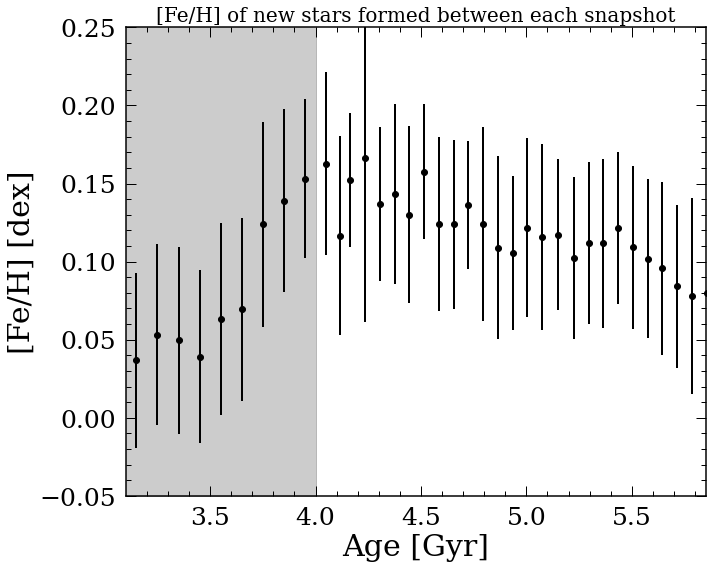

In [19]:
xage = (np.array(allages_rs[1:])+np.array(allages_rs[:-1]))/2
plt.figure(figsize=(10,8))
plt.errorbar(xage, meanfeh, yerr=stdfeh, fmt='ko')
plt.fill_between([3, 4], [-0.05, -0.05], y2=0.3 ,color='k', alpha=0.2)
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')
plt.ylim([-0.05, -0.05+0.3])
plt.xlim([3.1,5.85])
plt.title('[Fe/H] of new stars formed between each snapshot',fontsize=20)
plt.tight_layout()
plt.savefig('fehsnapshot.png')

In [ ]:
#5210781
len(agepickle)

In [343]:
s = pb.load(snaplookup[1430])
h=s.halos()
pb.analysis.angmom.faceon(h[1])
s.physical_units()

sim = h[1]

stars = sim.s
this_snap = pd.DataFrame({k:stars[k] for k in cols})
this_snap = pd.merge(this_snap, agepickle[['iord', 'age', 'feh_scale','Rbir','zbir','decomp']], left_on='iord', right_on='iord', how='inner')
this_snap.to_pickle(snaplookup[1430]+'.pkl')


In [344]:
s1 = pb.load(snaplookup[1570])
h1=s1.halos()
pb.analysis.angmom.faceon(h1[1])
s1.physical_units()

sim1 = h1[1]

stars1 = sim1.s
this_snap1 = pd.DataFrame({k:stars1[k] for k in cols})
this_snap1 = pd.merge(this_snap1, agepickle[['iord', 'age', 'feh_scale','Rbir','zbir','decomp']], left_on='iord', right_on='iord', how='inner')
this_snap1.to_pickle(snaplookup[1570]+'.pkl')



In [345]:
newstars = this_snap1.loc[~(this_snap1['iord'].isin(this_snap['iord'].values))]

newstars


,iord,r,z,age,feh_scale,Rbir,zbir,decomp
2094881,45705536,8.776078,-0.616017,4.024058,0.060145,8.589427,0.461696,4
2094882,45705537,9.500857,-0.679277,4.024058,0.062435,8.745449,0.351029,4
2094883,45705538,13.374294,-2.041340,4.024058,-0.024249,13.797297,-0.059080,4
2094884,45705539,12.960760,-1.902813,4.024058,-0.015858,13.431702,0.060331,4
2094885,45705549,2.891767,0.030518,4.024058,0.279994,4.432331,-0.160408,1
...,...,...,...,...,...,...,...,...
2301030,46243860,2.741684,0.073710,3.036362,0.124952,2.740024,0.066165,1
2301031,46243861,2.765131,-0.086514,3.036362,0.123079,2.762760,-0.093998,1
2301032,46243874,3.537736,-0.058771,3.036362,0.156272,3.538082,-0.057191,1
2301033,46243875,3.424857,-0.089248,3.036362,0.192531,3.424564,-0.087671,4


In [346]:
newstars['age']

2094881    4.024058
2094882    4.024058
2094883    4.024058
2094884    4.024058
2094885    4.024058
             ...   
2301030    3.036362
2301031    3.036362
2301032    3.036362
2301033    3.036362
2301034    3.036362
Name: age, Length: 206154, dtype: float64